In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import Image
%matplotlib inline

### In this problemset you will be implementing the following network

 $$\begin{align} 
 L_1 &=  \text{sigm}(X\cdot W_1 + b_1)  & X \in \mathbb{R}^{n\times 784}\;\;\;\;& W_1 \in \mathbb{R}^{784\times k_1} & b_1 \in \mathbb{R}^{k_1}\\
 L_2 &=  \text{sigm}(L_1\cdot W_2 + b_2) && W_2 \in \mathbb{R}^{k_1\times k_2} & b_2 \in \mathbb{R}^{k_2}\\
 L_3 &=  \text{sigm}(L_2\cdot W_3 + b_3) && W_3 \in \mathbb{R}^{k_2\times k_3} & b_3 \in \mathbb{R}^{k_3}\\
 L_4 &=  \text{sigm}(L_3\cdot W_4 + b_4) && W_4 \in \mathbb{R}^{k_3\times k_4} & b_4 \in \mathbb{R}^{k_3}\\
 \text{logits} &=  \text{sigm}(L_4\cdot W_5 + b_5) && W_5 \in \mathbb{R}^{k_4 \times 10} & b_5 \in \mathbb{R}^{10}\\
 \hat{y} &=  \text{softmax}(\text{logits}) &\rightarrow \text{this is the prediction}&\\
\end{align}$$

and the **cross entropy** (loss):

$$loss(y,\hat{y})=-\frac{1}{N}\sum y_i\log(\hat{y}_i)$$

with $k1=200$, $k_2=100$, $k_3=60$, $k_4=30$

and using an **AdamOptimizer**.

see https://cloud.google.com/blog/big-data/2017/01/learn-tensorflow-and-deep-learning-without-a-phd


num parameters 185300


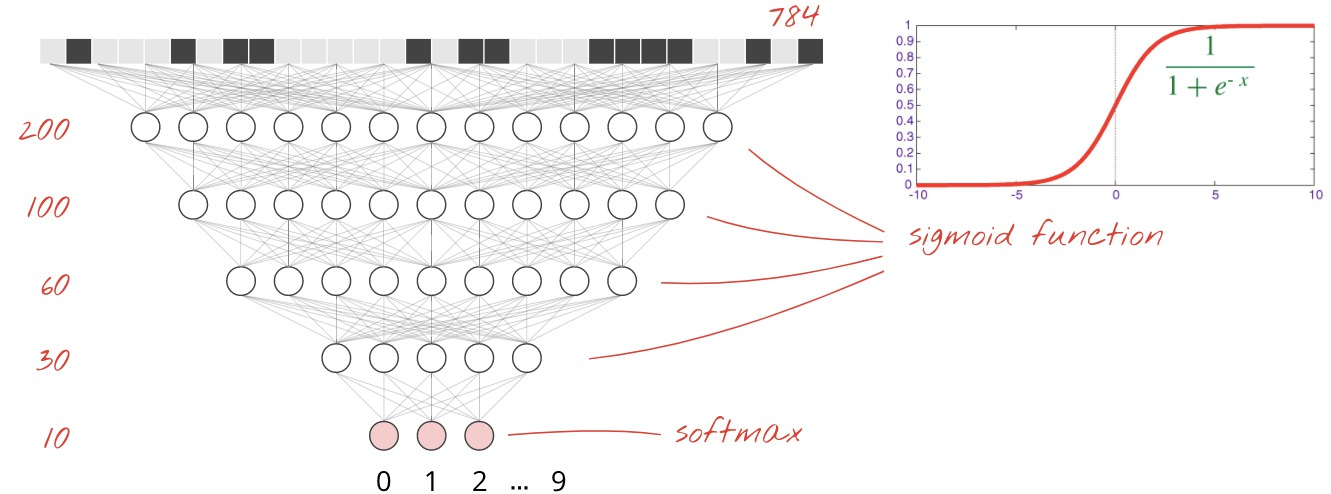

In [3]:
input_size = 784
num_classes = 10
k1,k2,k3,k4 = 200, 100, 60, 30
print "num parameters", input_size*k1+k1 + k1*k2+k2 + k2*k3+k3 + k3*k4+k4 + k4*10+10
Image(filename='imgs/fc5.jpg', width=800)

### first we load the MNIST dataset

In [ ]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/MNIST_data/", one_hot=True, reshape=False, validation_size=0)

In [ ]:
print mnist.train.images.shape
print mnist.test.images.shape

In [ ]:
# number of images used for training and test
n=60000

train_imgs = mnist.train.images.reshape(-1,28*28)[:n]
train_ohlabs = mnist.train.labels[:n]
train_labels = np.r_[[np.argwhere(i)[0][0] for i in train_ohlabs]]

In [ ]:
vn = n if n<mnist.test.images.shape[0] else mnist.test.images.shape[0]
test_imgs = mnist.test.images.reshape(-1,28*28)[:vn]
test_ohlabs = mnist.test.labels[:vn]
test_labels = np.r_[[np.argwhere(i)[0][0] for i in test_ohlabs]]

In [ ]:
print pd.Series(train_labels).value_counts()
print pd.Series(test_labels).value_counts()

In [ ]:
print train_imgs.shape, test_imgs.shape

## Problem 1: Create TensorFlow variables

- use `tf.placeholder` for `X` and  `Y`
- use `tf.Variable` for weights and biases
- use `tf.truncated_normal` with `stdev=.1` for variable initialization
- use `name=` for both placeholders and variables to later identify them in the graph

In [ ]:
def get_TF_vars(input_size, num_classes, layer1_size, layer2_size, layer3_size, layer4_size):
    
    tf.reset_default_graph()
    
    with tf.name_scope("data"):
        X = ...
        Y = ...

    with tf.name_scope("weights_biases"):
        W1 = ...
        b1 = ...

        W2 = ...
        b2 = ...

        W3 = ...
        b3 = ...

        W4 = ...
        b4 = ...

        W5 = ...
        b5 = ...
       
    return X,Y, W1,b1, W2,b2, W3,b3, W4,b4, W5,b5
    

check shapes of your variables

In [ ]:
vars = get_TF_vars(input_size, num_classes, k1, k2, k3, k4)
X,Y, W1,b1, W2,b2, W3,b3, W4,b4, W5,b5 = vars

shapes = [[None, input_size],  [None,num_classes], [input_size, k1], [k1], 
          [k1,k2], [k2], [k2,k3], [k3], [k3,k4], [k4], [k4,num_classes], [num_classes]]
for v,shape in zip(vars, shapes):
    print v.shape.as_list() == shape, v.shape.as_list() , shape

## Problem 2: create computational graph

- follow the equations above
- add a dropout unit after each layer with `pkeep` as given in the argument.
- use `tf.nn.sigmoid`, `tf.matmul`, `tf.nn.dropout`, `tf.nn.softmax` for layers
- use `tf.nn.softmax_cross_entropy_with_logits` to compute the loss
- use `tf.train.AdamOptimizer` as optimizer with `learning_rate` from the argument.

In [ ]:
def get_TF_graph(tf_vars, pkeep=None, learning_rate=0.01):
    
    X,Y, W1,b1, W2,b2, W3,b3, W4,b4, W5,b5 = tf_vars

    with tf.name_scope("layers"):

        L1 = ...
        if pkeep is not None:
            L1 = ...
            
        L2 = ...
        if pkeep is not None:
            L2 = ...
            
        L3 = ...
        if pkeep is not None:
            L3 = ...
            
        L4 = ...
        if pkeep is not None:
            L4 = ...
            
        logits = ...
        y_hat  = ...
 
    with tf.name_scope("loss"):
        # cross entropy
        cross_entropy = ...
        loss          = tf.reduce_mean(cross_entropy)*100

    with tf.name_scope("optimizer"):
        optimizer  = ...
        train_step = optimizer.minimize(loss)
                
    with tf.name_scope("accuracy"):
        correct_pred = tf.equal(tf.argmax(y_hat, 1), tf.argmax(Y, 1))
        accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))    
    
    return y_hat, loss, train_step, accuracy

In [ ]:

tf_vars = get_TF_vars(input_size, num_classes, k1, k2, k3, k4)

y_hat, loss, train_step, accuracy = get_TF_graph(tf_vars)

## Problem 3: complete optimization loop

**complete** the `sess.run` commands

observe that:
- model is saved at the end
- we keep track of accuracy in train and test to plot it later


In [ ]:
def fit (X_train, y_train, X_test, y_test, 
         model_name, loss, train_step, accuracy, 
         batch_size, n_epochs, log_freq):
    
    X,Y, W1,b1, W2,b2, W3,b3, W4,b4, W5,b5 = tf_vars
    
    saver = tf.train.Saver()

    tf.summary.histogram("W1", W1)
    tf.summary.histogram("b1", b1)
    tf.summary.histogram("W2", W2)
    tf.summary.histogram("b2", b2)
    tf.summary.histogram("W3", W3)
    tf.summary.histogram("b3", b3)
    tf.summary.histogram("W4", W4)
    tf.summary.histogram("b4", b4)
    tf.summary.histogram("W5", W5)
    tf.summary.histogram("b5", b5)

    summary_merged = tf.summary.merge_all()
    summary_train_accuracy = tf.summary.scalar("train_accuracy", accuracy)
    summary_test_accuracy   = tf.summary.scalar("test_accuracy", accuracy)

    summary_train_loss = tf.summary.scalar("train_loss", loss)
    summary_test_loss   = tf.summary.scalar("test_loss", loss)    
    
    # Initialize the variables (i.e. assign their default value)
    initg = tf.global_variables_initializer()
    log_train, log_test = [], []

    # Start training
    from rlx.ml import Batches
    from time import time

    with tf.Session() as sess:
        from datetime import datetime
        date = datetime.now()
        datestr = date.strftime("%m-%d_%H:%M")

        model_name = model_name + "_" + datestr
        log_name   = "log/"+model_name
        print "logging to ", log_name
        summary_writer = tf.summary.FileWriter(log_name,sess.graph)
        
        tf.initialize_all_variables()
        sess.run(initg)

        step = 1
        t1 = time()
        for epoch in range(1,n_epochs+1):
            ndata = 0
            for batch_X, batch_y in Batches([X_train, y_train], batch_size=batch_size, n_epochs=1).get():
                ndata += len(batch_X)

                # -------------------------------------------
                # *** YOUR CODE HERE *** RUN train_step AND COMPUTE ACCURACIES AND LOSS
                summ_acc, summ_loss, train_acc, optimizer_step =  sess.run(...)
                # -------------------------------------------
                
                summary_writer.add_summary(summ_acc, step)
                summary_writer.add_summary(summ_loss, step)
                t2 = time()
                log_train.append([step, t2-t1, train_acc])
                print "\repoch %3d/%d step %5d: train acc: %.4f, time: %.3f segs, %7d/%d"%\
                      (epoch, n_epochs, step, train_acc, (t2-t1), ndata, len(train_imgs)),    

                if step%log_freq==0:
                    
                    # --------------------------------------------------------
                    # *** YOUR CODE HERE *** COMPUTE ACCURACY IN TEST DATA
                    test_acc = sess.run(...)
                    # --------------------------------------------------------


                    print "\repoch %3d/%d step %5d: train acc: %.4f, test acc: %.4f, time: %.3f segs, %d data items"%\
                          (epoch, n_epochs, step, train_acc, test_acc, (t2-t1), ndata)     

                    log_test.append([step, t2-t1, test_acc])
                    summ_merged, summ_test_acc = sess.run([summary_merged, summary_test_accuracy], 
                                                          feed_dict = {X: test_imgs, Y: test_ohlabs})  
                    summary_writer.add_summary(summ_merged, step)
                    summary_writer.add_summary(summ_test_acc, step)

                step += 1

        print("Optimization Finished!")

        # Calculate accuracy for test images
        print("Testing Accuracy:", \
            sess.run(accuracy, feed_dict={X: test_imgs, Y: test_ohlabs}))

        saver.save(sess, "models/"+model_name+".tf")
        log_train = pd.DataFrame(log_train, columns=["step", "time", "accuracy"])
        log_test  = pd.DataFrame(log_test, columns=["step", "time", "accuracy"])
    return log_train, log_test

def plot_results(log_train, log_test):
    k = log_train.rolling(window=10).mean().dropna()
    plt.plot(k.time, k.accuracy, color="blue", lw=2, label="train")
    plt.plot(log_test.time, log_test.accuracy, color="red",lw=2, label="test")
    plt.legend(loc="center left", bbox_to_anchor=(1,.5))
    plt.plot(log_train.time, log_train.accuracy, alpha=.3, color="blue")
    plt.grid()
    plt.xlabel("elapsed time (secs)")
    plt.ylabel("accuracy")
    plt.axhline(0.5, color="black")
    plt.ylim(0.8,1.)
    plt.xlim(0,log_train.time.max()+1)
    plt.title("final train_acc=%.4f, test_acc=%.4f"%(log_train.accuracy.values[-1], log_test.accuracy.values[-1]))

### run optimization

In [ ]:
tf_vars = get_TF_vars(input_size, num_classes, k1, k2, k3, k4)

y_hat, loss, train_step, accuracy = get_TF_graph(tf_vars)

log_train, log_test = fit(train_imgs, train_ohlabs, test_imgs, test_ohlabs,
                         "dnn_mnist", loss, train_step, accuracy,
                         batch_size=100, n_epochs=20, log_freq=600)

plot_results(log_train, log_test)

## Problem 4: add improvements and run experiments

- add tensorboard histograms and scalar
- weight decay
- dropout
- save model every log_freq
- do the following experiments


    log_train, log_test = fit(train_imgs, train_ohlabs, test_imgs, test_ohlabs,
                             "dnn_mnist", loss, train_step, accuracy,
                             batch_size=100, n_epochs=20, log_freq=600)

    log_train, log_test = fit(train_imgs, train_ohlabs, test_imgs, test_ohlabs,
                             "dnn_mnist", loss, train_step, accuracy,
                             batch_size=1000, n_epochs=20, log_freq=60) 

    log_train, log_test = fit(train_imgs, train_ohlabs, test_imgs, test_ohlabs,
                             "dnn_mnist", loss, train_step, accuracy,
                             batch_size=10, n_epochs=20, log_freq=6000)

    y_hat, loss, train_step, accuracy = get_TF_graph(tf_vars, pkeep=.5)
    log_train, log_test = fit(train_imgs, train_ohlabs, test_imgs, test_ohlabs,
                             "dnn_mnist", loss, train_step, accuracy,
                             batch_size=100, n_epochs=20, log_freq=600)
                             
    y_hat, loss, train_step, accuracy = get_TF_graph(tf_vars, pkeep=.75)
    log_train, log_test = fit(train_imgs, train_ohlabs, test_imgs, test_ohlabs,
                             "dnn_mnist", loss, train_step, accuracy,
                             batch_size=100, n_epochs=20, log_freq=600)
                                                          
    tf_vars = get_TF_vars(input_size, num_classes, 20, 15, 12, 10)
    y_hat, loss, train_step, accuracy = get_TF_graph(tf_vars)
    log_train, log_test = fit(train_imgs, train_ohlabs, test_imgs, test_ohlabs,
                             "dnn_mnist", loss, train_step, accuracy,
                             batch_size=100, n_epochs=20, log_freq=600)
